## 1.3 Research Questions

### This study is guided by four structured research questions:

* What are the common patterns of global food waste observed across various open-source datasets in terms of volume?

* Which key factors contribute most significantly to food waste across different regions, socioeconomic levels, and demographics?

* What is the relationship between food waste generation and environmental indicators such as carbon emissions, land use, and water consumption?

* To what extent do statistical analytics reveal the strength and direction of the relationship between socioeconomic factors and food waste generation?

* In what ways can the findings contribute to achieving Sustainable Development Goal 12 (Responsible Consumption and Production) and related environmental targets?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

In [ ]:
# Dataset

faostat_commodities_csv = 'FAOSTAT-Food-Commodities.csv'
annex2_urban_vs_rural_csv = 'annex2.csv'


In [6]:
# Read CSVsscipy

df_commodities = pd.read_csv(faostat_commodities_csv)
df_urban_rural = pd.read_csv(annex2_urban_vs_rural_csv)

FileNotFoundError: [Errno 2] No such file or directory: 'FAOSTAT-Food-Commodities.csv'

In [ ]:
df_commodities

,Domain,Area,Element,Item,Year,Unit,Value
0,"Food Balances (-2013, old methodology and popu...",Afghanistan,Production,Wheat and products,2011,1000 t,3388.0
1,"Food Balances (-2013, old methodology and popu...",Afghanistan,Production,Wheat and products,2012,1000 t,5050.0
2,"Food Balances (-2013, old methodology and popu...",Afghanistan,Production,Wheat and products,2013,1000 t,5169.0
3,"Food Balances (-2013, old methodology and popu...",Afghanistan,Losses,Wheat and products,2011,1000 t,508.0
4,"Food Balances (-2013, old methodology and popu...",Afghanistan,Losses,Wheat and products,2012,1000 t,758.0
...,...,...,...,...,...,...,...
40822,"Food Balances (-2013, old methodology and popu...",Zimbabwe,Production,Freshwater Fish,2012,1000 t,18.1
40823,"Food Balances (-2013, old methodology and popu...",Zimbabwe,Production,Freshwater Fish,2013,1000 t,18.1
40824,"Food Balances (-2013, old methodology and popu...",Zimbabwe,Production,Crustaceans,2011,1000 t,0.0
40825,"Food Balances (-2013, old methodology and popu...",Zimbabwe,Production,Crustaceans,2012,1000 t,0.0


In [ ]:
commodities_df_filtered = df_commodities[df_commodities['Element'].isin(['Production', 'Losses'])]

df_pivot = commodities_df_filtered.pivot_table(
    index=['Area', 'Item', 'Year'],
    columns='Element',
    values='Value',
    aggfunc='sum'
).reset_index()

df_pivot = df_pivot[df_pivot['Production'] > 0]

df_pivot['Loss_Percentage'] = (df_pivot['Losses'] / df_pivot['Production']) * 100

commodity_loss = df_pivot.groupby('Item')['Loss_Percentage'].mean().sort_values(ascending=False)


In [ ]:
print(commodity_loss.head(15))

Item
Maize and products                 158.703995
Grapes and products (excl wine)    100.966283
Wheat and products                  65.221269
Soyabeans                           59.256431
Bananas                             46.502731
Barley and products                 35.076199
Butter, Ghee                        28.270644
Palm Oil                            25.897941
Pineapples and products             22.953817
Lemons, Limes and products          20.174779
Rape and Mustardseed                19.887070
Rice (Milled Equivalent)            16.302397
Fruits, other                       15.530666
Beans                               14.335465
Apples and products                 14.075317
Name: Loss_Percentage, dtype: float64


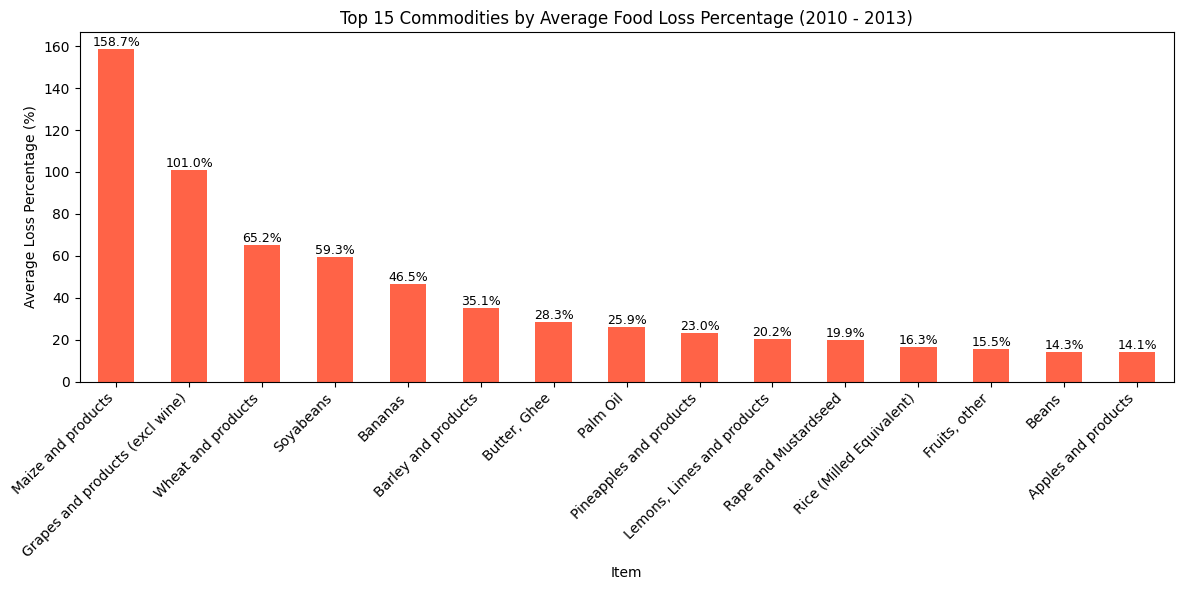

In [ ]:
plt.figure(figsize=(12,6))

ax = commodity_loss.head(15).plot(kind='bar', color='tomato')

plt.ylabel('Average Loss Percentage (%)')
plt.title('Top 15 Commodities by Average Food Loss Percentage (2010 - 2013)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.savefig('commodity_loss.png')
plt.show()


=== STATISTICAL ANALYSIS (RQ2) ===
Average Urban Waste: 75.00 kg/capita
Average Rural Waste: 42.00 kg/capita
Gap: Urban centers generate 79% more waste than rural areas.
T-Test p-value: 0.0267 (Significant if < 0.05)


/tmp/ipykernel_6165/1363156508.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_urban_rural, x='Type', y='Waste_Estimate_kg_capita_year', palette='coolwarm')


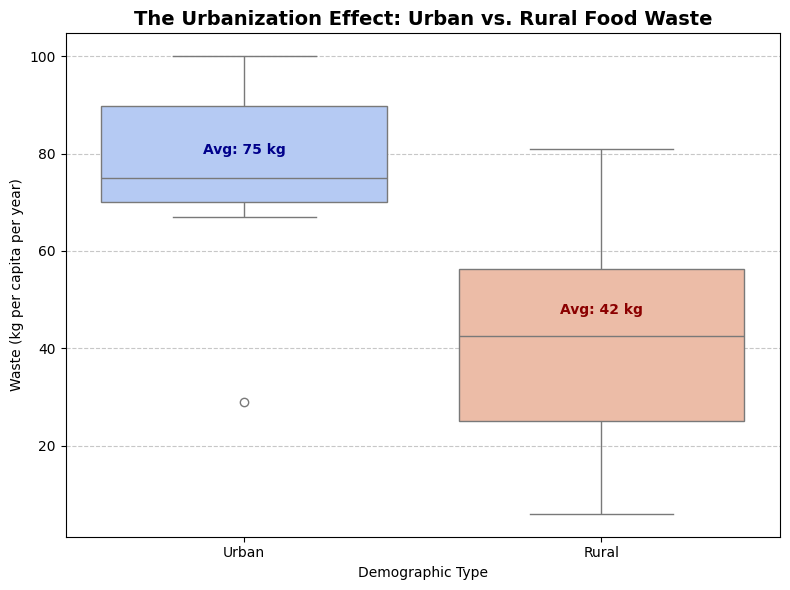

In [ ]:
df_urban_rural = df_urban_rural.rename(columns={
    'Study Area': 'Study_Area',
    'Waste Estimate (kg/capita/year)': 'Waste_Estimate_kg_capita_year'
})

urban_avg = df_urban_rural[df_urban_rural['Type'] == 'Urban']['Waste_Estimate_kg_capita_year'].mean()
rural_avg = df_urban_rural[df_urban_rural['Type'] == 'Rural']['Waste_Estimate_kg_capita_year'].mean()

print(f"=== STATISTICAL ANALYSIS (RQ2) ===")
print(f"Average Urban Waste: {urban_avg:.2f} kg/capita")
print(f"Average Rural Waste: {rural_avg:.2f} kg/capita")
print(f"Gap: Urban centers generate {((urban_avg - rural_avg)/rural_avg)*100:.0f}% more waste than rural areas.")

# Perform T-Test (To prove the gap is real, not random)
t_stat, p_val = ttest_ind(
    df_urban_rural[df_urban_rural['Type'] == 'Urban']['Waste_Estimate_kg_capita_year'],
    df_urban_rural[df_urban_rural['Type'] == 'Rural']['Waste_Estimate_kg_capita_year']
)
print(f"T-Test p-value: {p_val:.4f} (Significant if < 0.05)")

# Generate the Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_urban_rural, x='Type', y='Waste_Estimate_kg_capita_year', palette='coolwarm')

# Titles and Labels
plt.title('The Urbanization Effect: Urban vs. Rural Food Waste', fontweight='bold', fontsize=14)
plt.xlabel('Demographic Type')
plt.ylabel('Waste (kg per capita per year)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotation for the Gap
plt.text(0, urban_avg + 5, f"Avg: {urban_avg:.0f} kg", ha='center', color='darkblue', weight='bold')
plt.text(1, rural_avg + 5, f"Avg: {rural_avg:.0f} kg", ha='center', color='darkred', weight='bold')

plt.tight_layout()
plt.savefig('figure2_urban_rural.png')
plt.show()